In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

In [3]:
df=pd.read_csv('./boston.csv')
print('No of samples:',df.shape[0])
print('No of features:',df.shape[1])
df

No of samples: 506
No of features: 14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


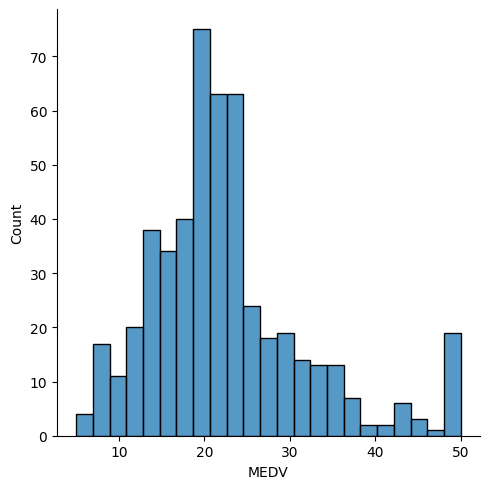

In [4]:
sns.displot(df['MEDV'])

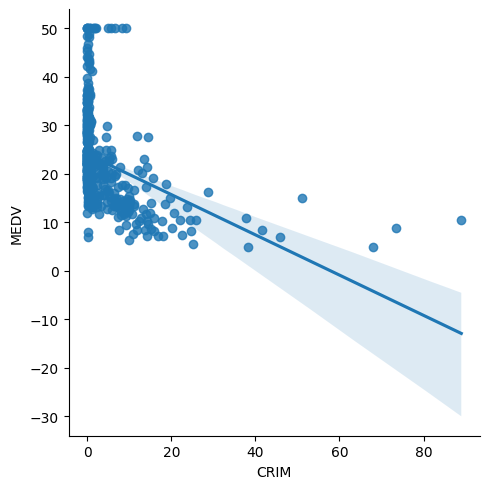

In [7]:
sns.lmplot(x='CRIM',y='MEDV',data=df)

## we can say the higher the price of home, lower is the crime rate.

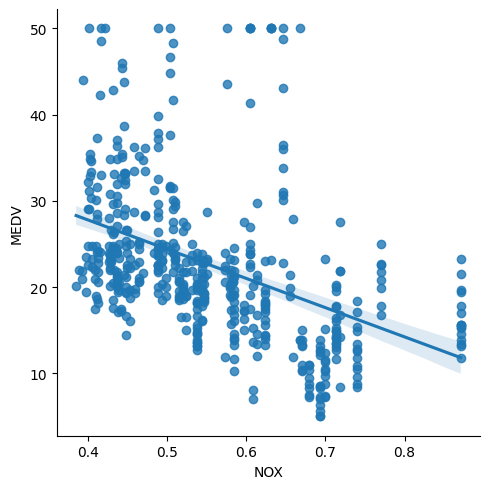

In [8]:
sns.lmplot(x='NOX',y='MEDV',data=df)

In [9]:
X=df.drop(['MEDV'],axis=1)
Y=df['MEDV']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

In [11]:
# METRICS FUNCTION
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred=cross_val_score(model,X,Y,cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,cross_val_score

pipelines=[]
seed=42

pipelines=[]


pipelines.append(
            ('scaled_lr',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('LinearRegression',LinearRegression())
            ]))
)


pipelines.append(
            ('scaled_ridge',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('Ridge',Ridge(tol=10))
            ]))
)

pipelines.append(
            ('scaled_lasso',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('Lasso',Lasso(tol=1))
            ]))
)

pipelines.append(
            ('scaled_rf',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('RF',RandomForestRegressor(n_estimators=1000))
            ]))
)

pipelines.append(
            ('scaled_DT',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('DT',DecisionTreeRegressor(random_state=seed))
            ]))
)

pipelines.append(
            ('scaled_EN',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('ElasticNet',ElasticNet())
            ]))
)

pipelines.append(
            ('scaled_XGB',
            Pipeline([
                ('Scaler',StandardScaler()),
                ('XGBoost',XGBRegressor())
            ]))
)



scoring='r2'
names,results=[],[]
for name,model in pipelines:
    kfold=KFold(n_splits=7)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring,n_jobs=-1)
    names.append(name)
    results.append(cv_results[0])    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    

scaled_lr: 0.719770 (+/- 0.116222)
scaled_ridge: 0.720092 (+/- 0.116849)
scaled_lasso: 0.635527 (+/- 0.169237)
